In [1]:
from pystan import StanModel
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
d = pd.read_csv('data-rental.txt')
data = d.to_dict('list')
data['N'] = len(d)
Area_new = np.round(np.arange(d['Area'].min(), d['Area'].max()))
data['Area_new'] = list(Area_new)
data['N_new'] = len(Area_new)
data;

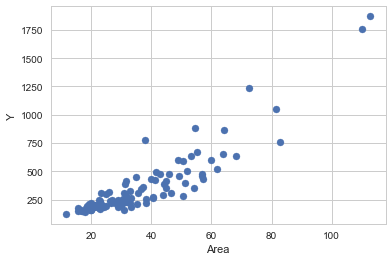

In [12]:
plt.scatter(d.Area, d.Y)
plt.xlabel("Area")
plt.ylabel("Y")
plt.show();

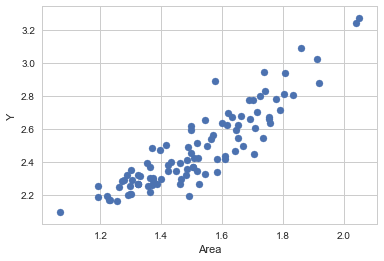

In [13]:
plt.scatter(np.log10(data['Area']), np.log10(data['Y']))
plt.xlabel("Area")
plt.ylabel("Y")
plt.show();

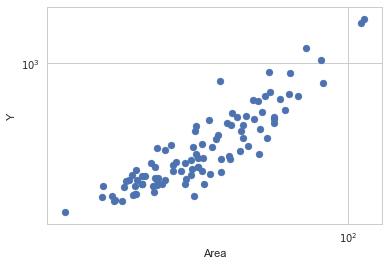

In [14]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(data['Area'], data['Y'] )
plt.xlabel("Area")
plt.ylabel("Y")
plt.show();

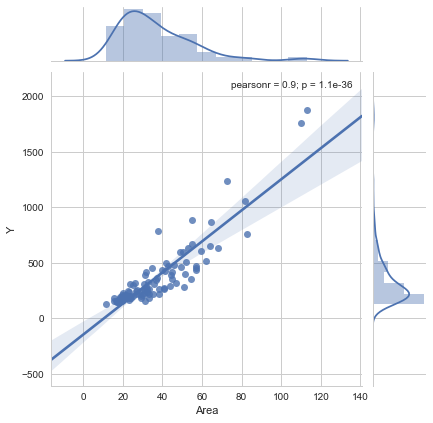

In [29]:
 sns.jointplot("Area", "Y", data=d, kind='reg');

In [15]:
stanmodel = StanModel(file='model7-1.stan')

In [17]:
fit = stanmodel.sampling(data=data, seed=123, thin = 1, warmup=500, n_jobs=-1)

In [18]:
fit

Inference for Stan model: anon_model_9a7052232136147da4741b4bca703900.
4 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b1          -148.4    0.57  29.01 -204.8 -167.7 -148.6 -129.2 -91.95   2600    1.0
b2            14.0    0.01   0.71  12.62  13.52   14.0  14.47  15.37   2544    1.0
s_Y         130.91    0.16    9.6 114.02 124.05 130.45  137.0  151.5   3627    1.0
mu[0]       420.87    0.17  13.17 394.72 412.14 420.98 429.86 446.72   6000    1.0
mu[1]       718.82    0.36  21.89 675.48 704.52 718.95 733.75 760.57   3752    1.0
mu[2]       623.47    0.28  18.23 586.89 611.67 623.59 636.27 658.55   4381    1.0
mu[3]       647.13    0.29  19.09 609.12 634.72 647.25 660.42 683.66   4188    1.0
mu[4]       647.13    0.29  19.09 609.12 634.72 647.25 660.42 683.66   4188    1.0
mu[5]        68.59    0.37  19.82  30.03  55.63  68.74  81.69 107

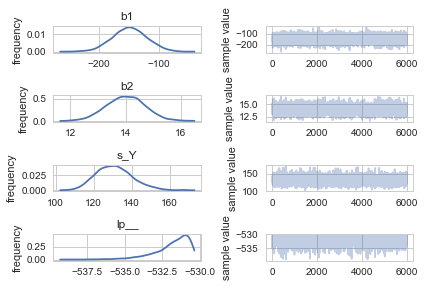

In [28]:
fit.traceplot(pars=['b1', 'b2','s_Y','lp__']).tight_layout()

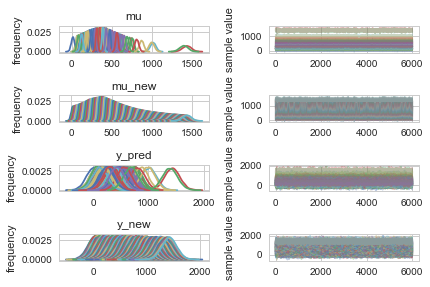

In [29]:
fit.traceplot(pars=['mu', 'mu_new','y_pred','y_new']).tight_layout()

In [19]:
def stanfit_to_dataframe(fit):
    summary = fit.summary()
    columns = summary['summary_colnames']
    index = summary['summary_rownames']
    data = summary['summary']
    return pd.DataFrame(data, index, columns)

In [20]:
fitdf = stanfit_to_dataframe(fit)
fitdf

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
b1,-148.428350,0.568987,29.012751,-204.856682,-167.754748,-148.599078,-129.210410,-91.948904,2600.0,1.000916
b2,14.001449,0.013982,0.705249,12.618545,13.524051,14.002131,14.471556,15.372146,2544.0,1.001292
s_Y,130.911866,0.159479,9.604539,114.019052,124.048768,130.449050,136.995606,151.499473,3627.0,0.999796
mu[0],420.870577,0.169962,13.165163,394.716921,412.142900,420.979938,429.859844,446.724636,6000.0,0.999913
mu[1],718.821418,0.357332,21.887843,675.482372,704.518198,718.949760,733.751768,760.565647,3752.0,1.000877
mu[2],623.471548,0.275375,18.226854,586.885125,611.669402,623.585236,636.265599,658.551899,4381.0,1.000654
mu[3],647.133997,0.294959,19.088211,609.115923,634.716777,647.254530,660.424287,683.657067,4188.0,1.000719
mu[4],647.133997,0.294959,19.088211,609.115923,634.716777,647.254530,660.424287,683.657067,4188.0,1.000719
mu[5],68.594114,0.365971,19.823356,30.034494,55.634282,68.736905,81.685783,107.084148,2934.0,1.000562
mu[6],299.618027,0.186688,13.336128,273.354131,290.459750,299.671994,308.459443,325.754592,5103.0,0.999856


In [23]:
fitdf_mu_new = fitdf.loc['mu_new[0]': 'mu_new[101]']
fitdf_y_new = fitdf.loc['y_new[0]': 'y_new[101]']

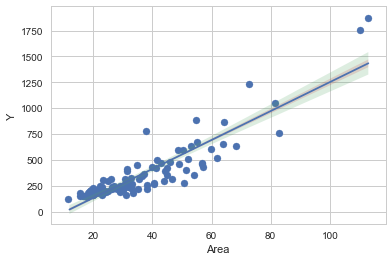

In [25]:
plt.plot(data['Area_new'], fitdf_mu_new['mean'])
plt.scatter(data['Area'], data['Y'])
plt.fill_between(data['Area_new'], fitdf_mu_new['2.5%'],  fitdf_mu_new['97.5%'], alpha=0.2)
plt.fill_between(data['Area_new'], fitdf_mu_new['25%'],  fitdf_mu_new['75%'], alpha=0.2)
plt.xlabel("Area")
plt.ylabel("Y")
plt.show();

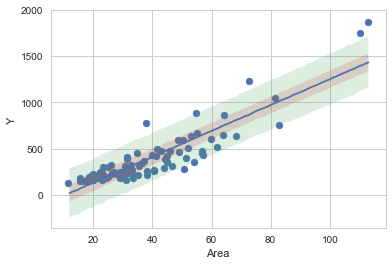

In [26]:
plt.plot(data['Area_new'], fitdf_y_new['mean'])
plt.scatter(data['Area'], data['Y'])
plt.fill_between(data['Area_new'], fitdf_y_new['2.5%'],  fitdf_y_new['97.5%'], alpha=0.2)
plt.fill_between(data['Area_new'], fitdf_y_new['25%'],  fitdf_y_new['75%'], alpha=0.2)
plt.xlabel("Area")
plt.ylabel("Y")
plt.show();

In [30]:
data_log = d.to_dict('list')
data_log['N'] = len(d)
data_log['Area'] = np.log10(data_log['Area'])
data_log['Y'] = np.log10(data_log['Y'])
Area_new = np.log10(np.round(np.arange(d['Area'].min(), d['Area'].max())))
data_log['Area_new'] = list(Area_new)
data_log['N_new'] = len(Area_new)

In [31]:
fit_log = stanmodel.sampling(data=data_log, seed=123, thin = 1, warmup=500, n_jobs=-1)

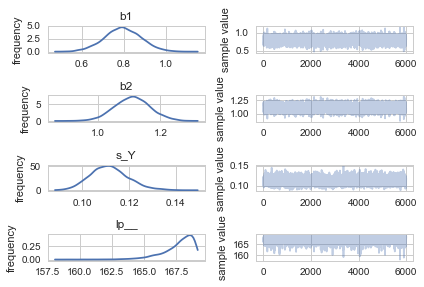

In [32]:
fit_log.traceplot(pars=['b1', 'b2','s_Y','lp__']).tight_layout()

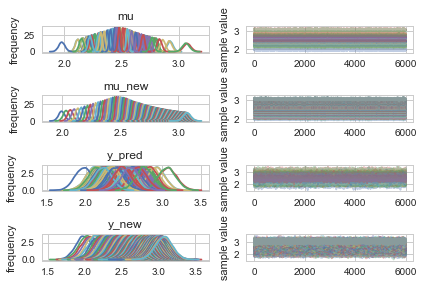

In [45]:
fit_log.traceplot(pars=['mu', 'mu_new','y_pred','y_new']).tight_layout()

In [46]:
fitdf_log = stanfit_to_dataframe(fit_log)
fitdf_log

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
b1,0.795468,0.002046,0.087102,0.623745,0.737876,0.794860,0.854490,0.967385,1813.0,1.000411
b2,1.110038,0.001335,0.056997,0.996990,1.072000,1.110488,1.148098,1.223653,1824.0,1.000540
s_Y,0.111637,0.000152,0.008135,0.096948,0.105999,0.111224,0.116649,0.129225,2853.0,1.000697
mu[0],2.581705,0.000180,0.012273,2.557651,2.573390,2.581723,2.590235,2.605786,4648.0,1.000682
mu[1],2.784625,0.000378,0.019237,2.746246,2.771605,2.784496,2.797601,2.822507,2587.0,1.000904
mu[2],2.728475,0.000314,0.016959,2.694679,2.717186,2.728498,2.739871,2.761582,2918.0,1.000900
mu[3],2.743031,0.000329,0.017533,2.707912,2.731437,2.742998,2.754870,2.777321,2837.0,1.000903
mu[4],2.743031,0.000329,0.017533,2.707912,2.731437,2.742998,2.754870,2.777321,2837.0,1.000903
mu[5],2.116782,0.000453,0.021598,2.074044,2.102296,2.116875,2.131104,2.159124,2277.0,1.000029
mu[6],2.466242,0.000143,0.011077,2.444318,2.458829,2.466257,2.473766,2.487948,6000.0,1.000189


In [47]:
fitdf_log_mu_new = fitdf_log.loc['mu_new[0]': 'mu_new[101]']
fitdf_log_y_new = fitdf_log.loc['y_new[0]': 'y_new[101]']

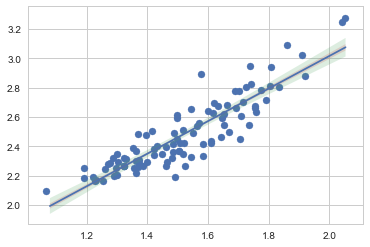

In [67]:
plt.plot(data_log['Area_new'], fitdf_log_mu_new['mean'])
plt.scatter(data_log['Area'], data_log['Y'])
plt.fill_between(data_log['Area_new'], fitdf_log_mu_new['2.5%'],  fitdf_log_mu_new['97.5%'], alpha=0.2)
plt.fill_between(data_log['Area_new'], fitdf_log_mu_new['25%'],  fitdf_log_mu_new['75%'], alpha=0.2)

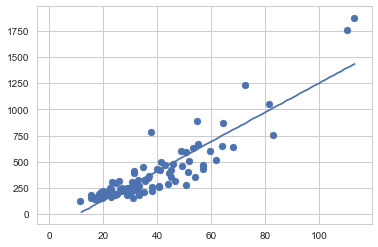

In [88]:
plt.plot(data['Area_new'], fitdf_y_new['mean'])
plt.scatter(data['Area'], data['Y'])
plt.fill_between(data['Area_new'], fitdf_log_y_new['2.5%'],  fitdf_log_y_new['97.5%'], alpha=0.2)
plt.fill_between(data['Area_new'], fitdf_log_y_new['25%'],  fitdf_log_y_new['75%'], alpha=0.2)

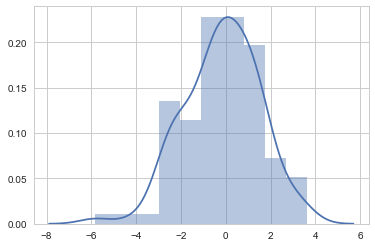

In [71]:
sns.distplot(fitdf_y_new['mean'].values -  fitdf_mu_new['mean'].values);

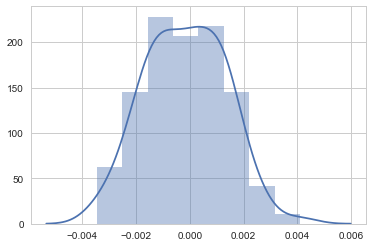

In [72]:
sns.distplot(fitdf_log_y_new['mean'].values -  fitdf_log_mu_new['mean'].values);